In [832]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox,zscore
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,SGDClassifier,SGDRegressor,ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report,mean_squared_error,mean_absolute_error
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
import joblib as joblib
from pandas.api.types import is_string_dtype,is_numeric_dtype
import warnings
warnings.filterwarnings('ignore')


In [833]:
df=pd.read_csv('heartdisease_data.csv',header=None,names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [834]:
df.shape

(200, 14)

In [835]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [836]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

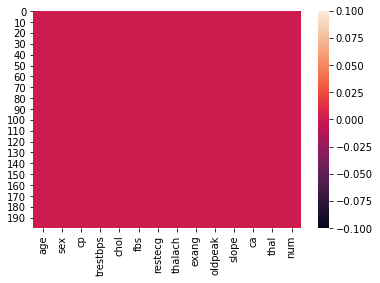

In [837]:
sns.heatmap(data=df.isnull())
#no missing values 

In [838]:
print(df['ca'].unique())
print(df['thal'].unique())
print(df['oldpeak'].unique())

['?' '0']
['?' '3' '7' '6']
['3' '0' '1.5' '2.5' '1.3' '-0.5' '2' '0.5' '1' '?' '1.6' '4' '3.5' '0.8'
 '1.7']


In [839]:
#replacing ? with mode
for col in df.columns:
    if(is_string_dtype(df[col])):
        simple_imp=SimpleImputer(missing_values='?',strategy='most_frequent')
        simple_imp.fit(df[[col]])
        df[col]=simple_imp.fit_transform(df[[col]]).ravel()
        



In [840]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,0,7,2
1,44,1,4,130,209,0,1,127,0,0,2,0,7,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,7,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,7,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,7,0


In [841]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [842]:
df.isin([-1]).sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [843]:
df['num'].unique()
#target variable num has 4 unique values where 0 denotes no heart disease and rest number denotes the heart disease
#Lets classify these numbers into two categories ie. 0-healthy,1-unhealthy

array([2, 0, 1, 3, 4], dtype=int64)

In [844]:
#Lets classify these numbers into two categories ie. a person has heart disease and a person does not have heart disease
df['num']=np.where(df['num']>0,1,0)

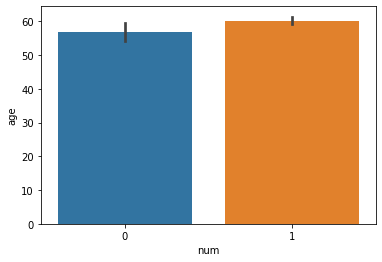

In [845]:
sns.barplot(data=df,y='age',x='num')
# people aged 60 and more has heart disease .

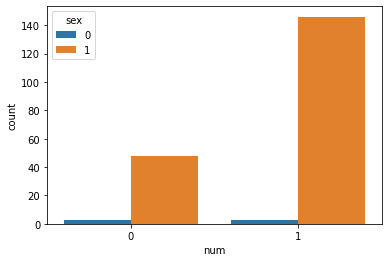

In [846]:
sns.countplot(data=df,x='num',hue='sex')
# female having more heart disease compare to male

In [847]:
df.isin([0]).sum()

age          0
sex          6
cp           0
trestbps     0
chol         0
fbs          0
restecg     80
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
num         51
dtype: int64

In [848]:
#convert string type to int
for col in df.columns:
    df[col]=df[col].astype(float)
print(type(df))    

<class 'pandas.core.frame.DataFrame'>


In [849]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num         float64
dtype: object

In [850]:
#replacing 0 with mean
print(df.head())
print(df['ca'].value_counts())

#drop ca column bcz it has only 0 values
#got error while imputing mean value for 0 as it has all 0 value 
df=df.drop('ca',axis=1)



    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  4.0     140.0  260.0  0.0      1.0    112.0    1.0      3.0   
1  44.0  1.0  4.0     130.0  209.0  0.0      1.0    127.0    0.0      0.0   
2  60.0  1.0  4.0     132.0  218.0  0.0      1.0    140.0    1.0      1.5   
3  55.0  1.0  4.0     142.0  228.0  0.0      1.0    149.0    1.0      2.5   
4  66.0  1.0  3.0     110.0  213.0  1.0      2.0     99.0    1.0      1.3   

   slope   ca  thal  num  
0    2.0  0.0   7.0  1.0  
1    2.0  0.0   7.0  0.0  
2    3.0  0.0   7.0  1.0  
3    1.0  0.0   7.0  1.0  
4    2.0  0.0   7.0  0.0  
0.0    200
Name: ca, dtype: int64


In [851]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,7.0,1.0
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,2.0,7.0,0.0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,7.0,1.0
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,7.0,1.0
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,7.0,0.0
5,66.0,1.0,3.0,120.0,0.0,0.0,1.0,120.0,0.0,-0.5,1.0,7.0,0.0
6,65.0,1.0,4.0,150.0,236.0,1.0,1.0,105.0,1.0,0.0,2.0,7.0,1.0
7,60.0,1.0,3.0,180.0,0.0,0.0,1.0,140.0,1.0,1.5,2.0,7.0,0.0
8,60.0,1.0,3.0,120.0,0.0,0.0,0.0,141.0,1.0,2.0,1.0,7.0,1.0
9,60.0,1.0,2.0,160.0,267.0,1.0,1.0,157.0,0.0,0.5,2.0,7.0,1.0


In [852]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,129.910000,172.490000,0.340000,0.735000,122.055000,0.740000,0.951000,2.065000,6.880000,0.745000
std,7.811697,0.171015,0.795701,19.280055,116.752497,0.474898,0.683455,18.876269,0.439735,1.110344,0.471046,0.589353,0.436955
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,3.000000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,112.000000,0.000000,0.000000,2.000000,7.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,214.000000,0.000000,1.000000,120.000000,1.000000,0.500000,2.000000,7.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,7.000000,1.000000


age            AxesSubplot(0.125,0.749828;0.227941x0.130172)
sex         AxesSubplot(0.398529,0.749828;0.227941x0.130172)
cp          AxesSubplot(0.672059,0.749828;0.227941x0.130172)
trestbps       AxesSubplot(0.125,0.593621;0.227941x0.130172)
chol        AxesSubplot(0.398529,0.593621;0.227941x0.130172)
fbs         AxesSubplot(0.672059,0.593621;0.227941x0.130172)
restecg        AxesSubplot(0.125,0.437414;0.227941x0.130172)
thalach     AxesSubplot(0.398529,0.437414;0.227941x0.130172)
exang       AxesSubplot(0.672059,0.437414;0.227941x0.130172)
oldpeak        AxesSubplot(0.125,0.281207;0.227941x0.130172)
slope       AxesSubplot(0.398529,0.281207;0.227941x0.130172)
thal        AxesSubplot(0.672059,0.281207;0.227941x0.130172)
num               AxesSubplot(0.125,0.125;0.227941x0.130172)
dtype: object

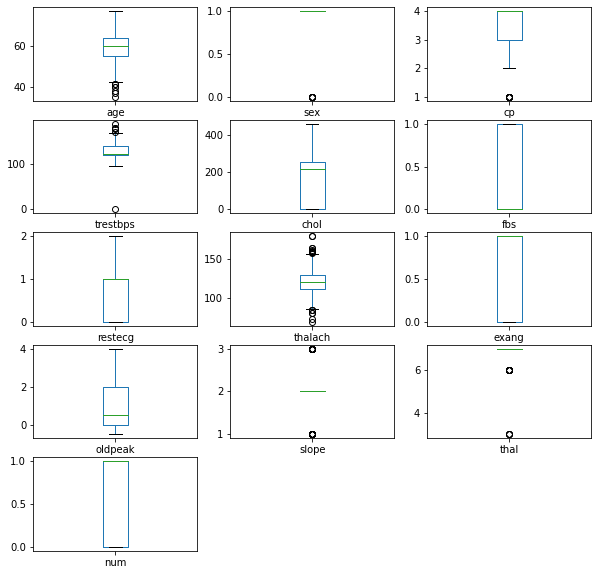

In [853]:
#chol,trestbps,thalach columns having skewed data bcz here thr is a diff between mean and 50%
#age,trestbps,chol,thalach column having outliers as bcz thr is a diff between 75% and max
#draw boxplot to confirm outlier
df.plot.box(layout=(5,3),subplots=True,figsize=(10,10))


In [854]:
#remove outliers
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df.shape


(177, 13)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B74194A4F0>,
      dtype=object)

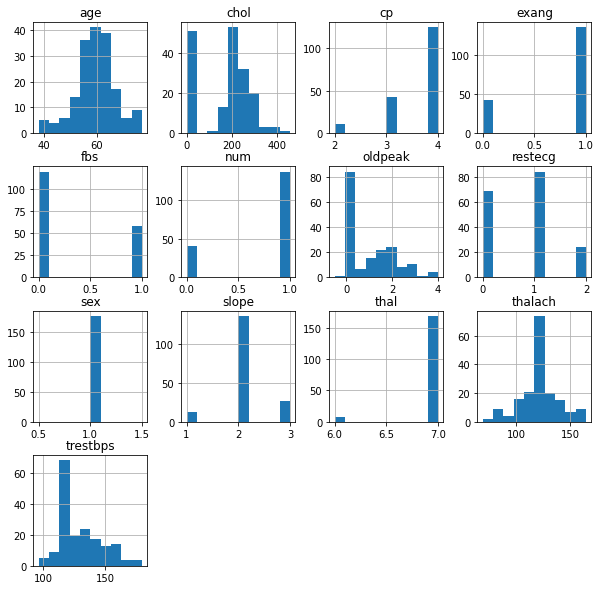

In [857]:
#Lets print histogram
df.hist(figsize=(10,10))
#from  pairplot/histogram it is found that thr is not much skewed data present in datset

               age  sex        cp  trestbps      chol       fbs   restecg  \
age       1.000000  NaN  0.023336  0.173061  0.052225  0.097437  0.074867   
sex            NaN  NaN       NaN       NaN       NaN       NaN       NaN   
cp        0.023336  NaN  1.000000  0.108773  0.075497  0.019628 -0.003787   
trestbps  0.173061  NaN  0.108773  1.000000  0.063474  0.142241  0.040291   
chol      0.052225  NaN  0.075497  0.063474  1.000000  0.111907 -0.006569   
fbs       0.097437  NaN  0.019628  0.142241  0.111907  1.000000  0.172814   
restecg   0.074867  NaN -0.003787  0.040291 -0.006569  0.172814  1.000000   
thalach  -0.120105  NaN -0.045596  0.108400 -0.064495  0.036744 -0.013862   
exang     0.054659  NaN  0.062700  0.019996  0.133081 -0.176478 -0.032828   
oldpeak   0.175923  NaN  0.230422  0.287425 -0.028188 -0.141665 -0.157370   
slope     0.102542  NaN  0.041706  0.063336  0.045452 -0.015088 -0.061090   
thal      0.005657  NaN  0.004899 -0.052483 -0.048275 -0.195761 -0.081487   

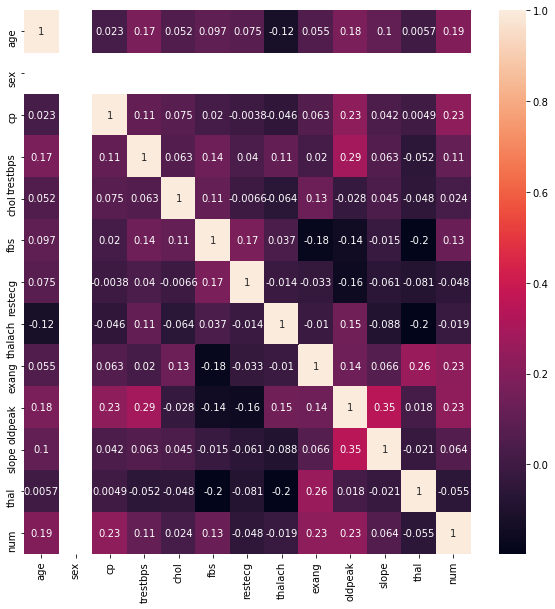

In [861]:
corr_=df.corr()
print(corr_)
plt.figure(figsize=(10,10))
sns.heatmap(data=corr_,annot=True)

In [862]:
#drop sex,thal column 
df=df.drop(['sex','thal'],axis=1)

In [863]:
df.shape

(177, 11)

In [864]:
#split feature and target variable
x=df.drop('num',axis=1)
y=df['num']
print(x.shape,y.shape)

(177, 10) (177,)


In [865]:
def findBestParam(reg_obj,param_arr):
    grid_cv=GridSearchCV(reg_obj,param_arr,cv=10)
    grid_cv.fit(x,y)
    return grid_cv.best_params_

In [866]:
lr=LogisticRegression()

mul_nb=MultinomialNB()
gaus_nb=GaussianNB()
svr=SVC()


In [874]:
params_={'criterion':['gini','entropy'],'max_depth':[2,5,10]}
dtree_reg=DecisionTreeClassifier()
print("dtree_reg best param :",findBestParam(dtree_reg,params_))
dtree_reg=DecisionTreeClassifier(criterion='gini',max_depth=5)

dtree_reg best param : {'criterion': 'entropy', 'max_depth': 5}


In [875]:
params_={'n_neighbors':[5,10,15,20]}
kn_reg=KNeighborsClassifier()
print("kn_reg best param :",findBestParam(kn_reg,params_))
kn_reg=KNeighborsClassifier(n_neighbors=15)

kn_reg best param : {'n_neighbors': 15}


In [876]:
params_={'alpha':[0.0001,0.001,0.01,0.1,1.0],'penalty':['l1','l2','elasticnet']}
sgd_reg=SGDClassifier()
print("sgd_reg best param :",findBestParam(sgd_reg,params_))
sgd_reg=SGDClassifier(alpha=1.0,penalty='l1')

sgd_reg best param : {'alpha': 0.0001, 'penalty': 'l2'}


In [877]:
params_={'learning_rate':[0.0001,0.001,0.01,0.1,1.0]}
gradient_reg=GradientBoostingClassifier()
print("gradient_reg best param :",findBestParam(gradient_reg,params_))
gradient_reg=GradientBoostingClassifier(learning_rate=0.0001)

gradient_reg best param : {'learning_rate': 0.0001}


In [871]:
params_={'learning_rate':[0.0001,0.001,0.01,0.1,1.0],'base_estimator':[dtree_reg,kn_reg,sgd_reg]}
ada_reg=AdaBoostClassifier()
print("ada_reg best param :",findBestParam(ada_reg,params_))
ada_reg=AdaBoostClassifier(base_estimator=dtree_reg,learning_rate=0.1)

ada_reg best param : {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.1}


In [873]:
rand_reg=RandomForestClassifier()


In [880]:
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',svr))
models.append(('DecisionTreeClassifier',dtree_reg))
models.append(('KNeighborsClassifier',kn_reg))
models.append(('SGDClassifier',sgd_reg))
models.append(('GaussianNB',gaus_nb))
#models.append(('MultinomialNB',mul_nb))
models.append(('Gradient Boost',gradient_reg))
models.append(('Ada Boost',ada_reg ))
models.append(('RandomForestClassifier',rand_reg))

In [881]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
#finding and storing matrix model wise
cross_val_list=[]
accuracy_list=[]
model_name_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='accuracy').mean())
    accuracy_list.append(accuracy_score(y_test,y_pred))
    model_name_list.append(reg_name)
    

In [882]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'accuracy_score':accuracy_list})
df_matrix

,Estimator_Name,cross_val_Score,accuracy_score
0,LogisticRegression,0.779085,0.888889
1,SVC,0.768301,0.944444
2,DecisionTreeClassifier,0.700654,0.805556
3,KNeighborsClassifier,0.768301,0.944444
4,SGDClassifier,0.716993,0.944444
5,GaussianNB,0.779739,0.805556
6,Gradient Boost,0.768301,0.944444
7,Ada Boost,0.705556,0.805556
8,RandomForestClassifier,0.779739,0.916667


In [884]:
#from above matrix RandomForestClassifier working better compare to other estimator .
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
kn_reg=KNeighborsClassifier(n_neighbors=15)
kn_reg.fit(x_train,y_train)
y_pred=kn_reg.predict(x_test)
print('score',kn_reg.score(x_train,y_train))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

score 0.7304964539007093
accuracy_score 0.9444444444444444
confusion_matrix 
 [[ 0  2]
 [ 0 34]]
classification_report               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.94      1.00      0.97        34

    accuracy                           0.94        36
   macro avg       0.47      0.50      0.49        36
weighted avg       0.89      0.94      0.92        36



In [ ]:
#kneighbor classifier working better